# Vibrações Mecânicas
## Professor Paulo Victor

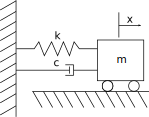

In [11]:
from IPython.core.display import SVG
SVG(filename='massa-mola-amortecedor.svg')

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Condições Iniciais:

In [13]:
x = 0 # Deslocamento inicial
v = 5 # Velocidade inicial em m/s

Parâmetros:

In [14]:
t = 0 # tempo inicial
tf = 15 # tempo final
h = 0.001 # passo de integração
n = int(tf/h) # número de pontos
zeta = 0.05 # razão de amortecimento
wn = 10 # frequência natural

X=np.zeros(n)
V=np.zeros(n)
T=np.zeros(n)
F=np.zeros(n)

X[0]=x
V[0]=v
T[0]=t

Definição de Funções:

$$ \dot{v} = -2 \zeta \omega_{n} v - \omega_{n}^{2}x$$

In [15]:
def vp(tt,xt,vt):
    return -2*zeta*wn*vt - wn**2*xt

$$ \dot{x} = v $$

In [16]:
def xp(tt,xt,vt):
    return vt

Integração Numérica:

In [17]:
for i in range(1,n):
    
    k1x=xp(t,x,v)
    k1v=vp(t,x,v)
    
    k2x=xp(t+h/2,x+h*k1x/2,v+h*k1v/2)
    k2v=vp(t+h/2,x+h*k1x/2,v+h*k1v/2)
    
    k3x=xp(t+h/2,x+h*k2x/2,v+h*k2v/2)
    k3v=vp(t+h/2,x+h*k2x/2,v+h*k2v/2)
    
    k4x=xp(t+h,x+h*k3x,v+h*k3v)
    k4v=vp(t+h,x+h*k3x,v+h*k3v)
    
    t=t+h
    x=x+(h/6)*(k1x+2*k2x+2*k3x+k4x)
    v=v+(h/6)*(k1v+2*k2v+2*k3v+k4v)
    
    X[i]=x
    V[i]=v
    T[i]=t

Plotar Gráficos:

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['figure.dpi']=150

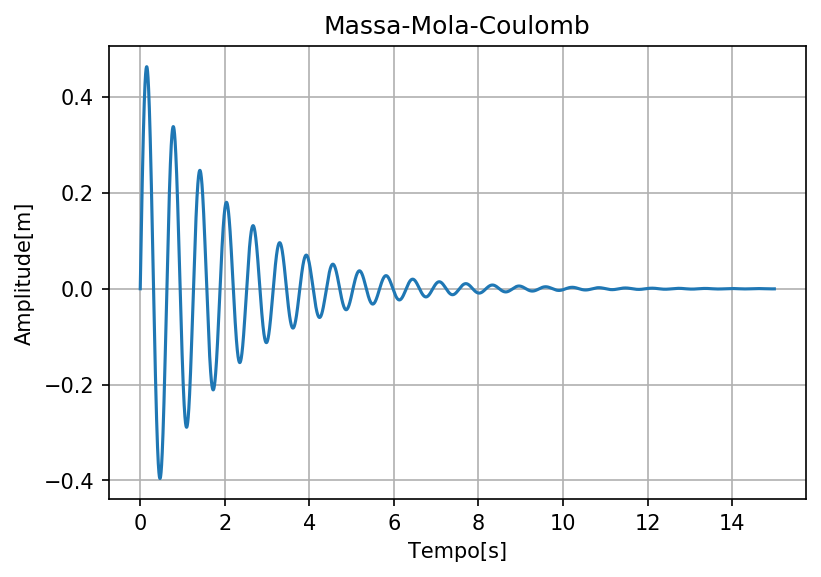

In [19]:
plt.figure()
plt.plot(T,X)
plt.title('Massa-Mola-Coulomb')
plt.xlabel('Tempo[s]')
plt.ylabel('Amplitude[m]')
plt.grid(True)
plt.show()

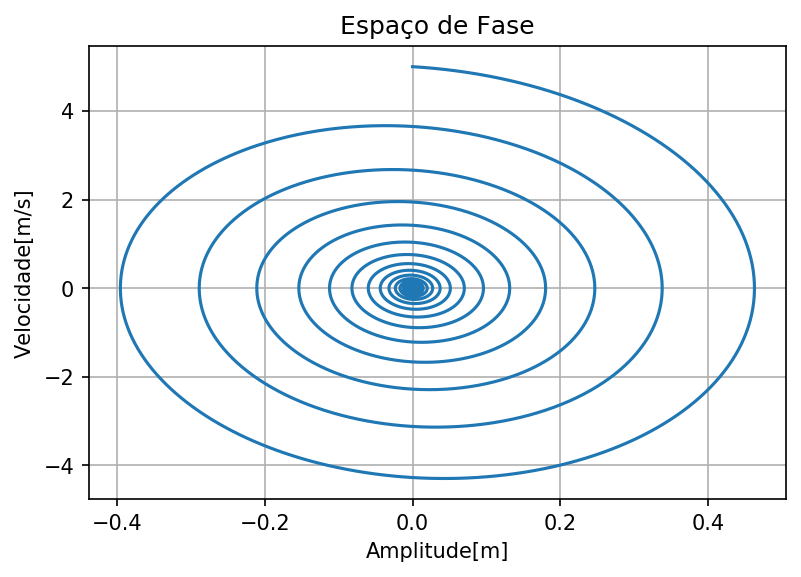

In [20]:
plt.figure()
plt.plot(X,V)
plt.title('Espaço de Fase')
plt.xlabel('Amplitude[m]')
plt.ylabel('Velocidade[m/s]')
plt.grid(True)
plt.show()